In [1]:
import warnings
warnings.filterwarnings('ignore')
import quandl
import pickle
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import time, datetime
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

style.use('ggplot')

/home/ayrus/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('criminal_train.csv')
# df.info()

In [3]:
df.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


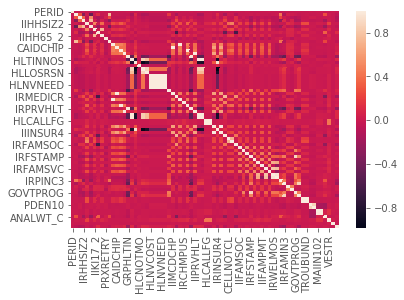

In [9]:
cor = df.corr()
import seaborn as sns
sns.heatmap(cor)

IFATHER  Criminal
-1       0               2
 1       0            7168
         1             612
 2       0            2605
         1             445
 3       0              10
         1               3
 4       0           32758
         1            2115
Name: Criminal, dtype: int64


[]

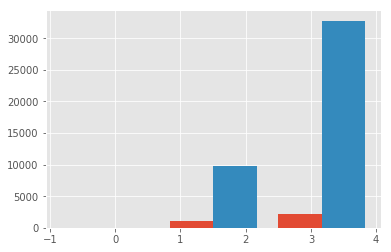

In [27]:
print (df.groupby(['IFATHER','Criminal'])['Criminal'].count())
IFATHER_sur = df['IFATHER'][df['Criminal']==1]
IFATHER_non_sur = df['IFATHER'][df['Criminal']==0]
plt.hist([IFATHER_sur,IFATHER_non_sur],bins = 3)
plt.plot()

NRCH17_2  Criminal
-1        0              75
          1               9
 0        0           30646
          1            2829
 1        0            4841
          1             158
 2        0            4496
          1             115
 3        0            2485
          1              64
Name: Criminal, dtype: int64


[]

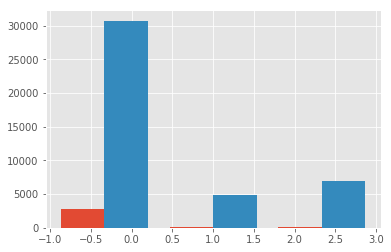

In [31]:
print (df.groupby(['NRCH17_2','Criminal'])['Criminal'].count())
IFATHER_sur = df['NRCH17_2'][df['Criminal']==1]
IFATHER_non_sur = df['NRCH17_2'][df['Criminal']==0]
plt.hist([IFATHER_sur,IFATHER_non_sur],bins = 3)
plt.plot()

The skewness of data is:  [ 3.06247916]


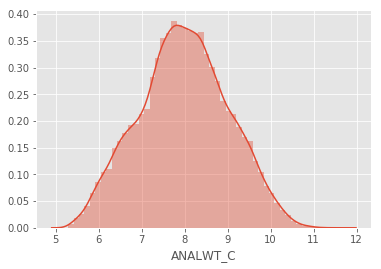

In [58]:

df['ANALWT_C'].isnull()
df['ANALWT_C'].fillna(df['ANALWT_C'].median())
t = np.log(df['ANALWT_C'].dropna()+200)
sns.distplot(t,bins=50)
# print('The skewness of data is: ',skew(np.array(df['ANALWT_C'].dropna())))
from scipy.stats import skew
print('The skewness of data is: ',skew(df[['ANALWT_C']]))

In [67]:
cnt = 0
cntc = 0
for i in df.columns:
    sk = skew(df[i])
    skc = np.log(skew(df[i]+100))
    print(i,np.log(skew(df[i]+100)))
    if(sk>-1 and sk<1):
        cnt +=1
    if(skc>-1 and skc<1):
        cntc +=1
print(cnt,cntc)

PERID -4.82536369809
IFATHER nan
NRCH17_2 0.523011121753
IRHHSIZ2 -1.81518670636
IIHHSIZ2 3.38522198594
IRKI17_2 -0.702012586822
IIKI17_2 2.7563430134
IRHH65_2 1.07198728222
IIHH65_2 2.56654897458
PRXRETRY nan
PRXYDATA nan
MEDICARE 2.64983767607
CAIDCHIP 2.30806298611
CHAMPUS 2.92970387799
PRVHLTIN 2.4618321738
GRPHLTIN -0.823669741568
HLTINNOS nan
HLCNOTYR 0.895104764673
HLCNOTMO nan
HLCLAST nan
HLLOSRSN nan
HLNVCOST nan
HLNVOFFR nan
HLNVREF nan
HLNVNEED nan
HLNVSOR nan
IRMCDCHP nan
IIMCDCHP 2.29773590157
IRMEDICR nan
IIMEDICR 2.62927731215
IRCHMPUS nan
IICHMPUS 2.89194208442
IRPRVHLT -0.784518813966
IIPRVHLT 2.45134501393
IROTHHLT nan
IIOTHHLT nan
HLCALLFG nan
HLCALL99 nan
ANYHLTI2 2.3248640396
IRINSUR4 0.945039421301
IIINSUR4 2.31407197663
OTHINS nan
CELLNOTCL 3.12605708092
CELLWRKNG 3.32360679354
IRFAMSOC nan
IIFAMSOC 2.30584108467
IRFAMSSI nan
IIFAMSSI 2.30235227316
IRFSTAMP nan
IIFSTAMP 2.61855977916
IRFAMPMT nan
IIFAMPMT 2.4243679744
IRFAMSVC nan
IIFAMSVC 2.55853433161
IRWELMOS 

In [16]:
X = np.array(df.drop(['PERID','Criminal'],1))
Y = np.array(df['Criminal'])
X = preprocessing.scale(X)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)

In [1]:
# clf = LinearRegression()
# clf = LogisticRegressionCV()
# clf = GradientBoostingClassifier()
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.02,
                                   max_depth=4,
                                   min_samples_leaf=15, min_samples_split=10, random_state =5)
# clf = svm.SVC(C=1,gamma=.002)
clf.score(X_train,Y_train)

NameError: name 'GradientBoostingClassifier' is not defined

In [24]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for clf in classifiers:
    clf.fit(X_train,Y_train)
    print(clf,clf.score(X_test,Y_test))
    

In [25]:
clf.score(X_test,Y_test)

0.95188101487314081

In [13]:
test = pd.read_csv('criminal_test.csv')
test.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


In [14]:
X_t = np.array(test.drop(['PERID'],1))
X_t = preprocessing.scale(X_t)

In [15]:
out = pd.DataFrame()
out['PERID'] = test['PERID']
out['Criminal']  = pd.DataFrame(clf.predict(X_t))
out.set_index('PERID').head()

,Criminal
PERID,
66583679,0
35494679,0
79424679,0
11744679,0
31554679,0


In [16]:
out.to_csv('out.csv',index=None)